In [1]:
%matplotlib inline
import eemeter
eemeter.samples()

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


['il-electricity-cdd-hdd-billing_bimonthly',
 'il-electricity-cdd-hdd-billing_monthly',
 'il-electricity-cdd-hdd-daily',
 'il-electricity-cdd-hdd-hourly',
 'il-electricity-cdd-only-billing_bimonthly',
 'il-electricity-cdd-only-billing_monthly',
 'il-electricity-cdd-only-daily',
 'il-electricity-cdd-only-hourly',
 'il-gas-hdd-only-billing_bimonthly',
 'il-gas-hdd-only-billing_monthly',
 'il-gas-hdd-only-daily',
 'il-gas-hdd-only-hourly',
 'il-gas-intercept-only-billing_bimonthly',
 'il-gas-intercept-only-billing_monthly',
 'il-gas-intercept-only-daily',
 'il-gas-intercept-only-hourly']

In [11]:
meter_data, temperature_data, metadata = eemeter.load_sample('il-electricity-cdd-hdd-daily')
data = eemeter.merge_temperature_data( meter_data, temperature_data, temperature_mean=False,heating_balance_points=[60, 61], cooling_balance_points=[70])
import json
model_fit = eemeter.caltrack_method(data)
print(json.dumps(model_fit.json(), indent=2))

{
  "status": "SUCCESS",
  "method_name": "caltrack_method",
  "model": {
    "model_type": "cdd_hdd",
    "formula": "meter_value ~ cdd_70 + hdd_60",
    "status": "QUALIFIED",
    "model_params": {
      "intercept": 11.751623378135884,
      "beta_cdd": 3.070146725078682,
      "beta_hdd": 0.8447599217224312,
      "cooling_balance_point": 70,
      "heating_balance_point": 60
    },
    "r_squared": 0.7294645737524558,
    "warnings": []
  },
  "r_squared": 0.7294645737524558,
  "warnings": [],
  "metadata": {},
  "settings": {
    "fit_cdd": true,
    "minimum_non_zero_cdd": 10,
    "minimum_non_zero_hdd": 10,
    "minimum_total_cdd": 20,
    "minimum_total_hdd": 20,
    "beta_cdd_maximum_p_value": 1,
    "beta_hdd_maximum_p_value": 1
  }
}


TypeError: caltrack_predict() missing 2 required positional arguments: 'prediction_index' and 'degree_day_method'

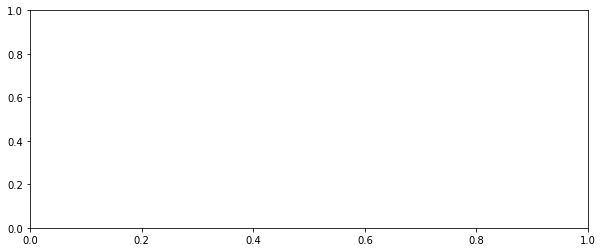

In [15]:
model_fit.r_squared


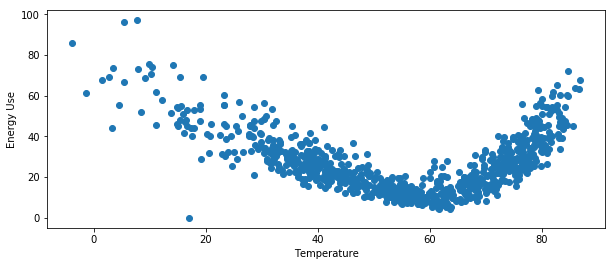

In [14]:
eemeter.plot_energy_signature(meter_data, temperature_data)